# **20230509**
<br>

## **Titanic: 생존자 예측하기**

### **Predict survival on the Titanic**

- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

### **1. 문제정의**

In [369]:
from IPython.display import Image
Image(url='https://static.timesofisrael.com/atlantajewishtimes/uploads/2022/03/DT6RD9-640x400.jpg')

### **2. 데이터**

traning data set and testing data set are given by Kaggle you can download
kaggle directly kaggle(https://www.kaggle.com/competitions/titanic/data)

#### **load train, test dataset using Pandas**

In [370]:
import pandas as pd

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

### **3. Exploratory data analysis**

Printing first 5 rows of the train dataset.

In [371]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### **Data Dictionary**

- Survived(생존 여부): 0 = No, 1 = Yes                  
=> 답
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp(형제/부부 탑승 여부): # of siblings / spouses aboard the Titanic
- parch(부모/자식 탑승 여부): # of parents / children aboard the Titanic
- ticket: Ticket number
- fare: 티켓 가격
- cabin: Cabin number
- embarked(선착장): Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset.

In [372]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [373]:
train['Survived'].value_counts() # => 불균형 데이터

Survived
0    549
1    342
Name: count, dtype: int64

In [374]:
def class_ratio(num):
    class_nan = train[train['Pclass']==num]['Cabin'].isnull().sum()
    class_count = train[train['Pclass']==num]['Cabin'].count()

    class_sum = class_nan+class_count
    class_rat = class_nan/class_sum

    print(num,'등칸 NaN 비율 : {0:.4f}'.format(class_rat))

In [375]:
class_ratio(1), class_ratio(2), class_ratio(3)

1 등칸 NaN 비율 : 0.1852
2 등칸 NaN 비율 : 0.9130
3 등칸 NaN 비율 : 0.9756


(None, None, None)

In [376]:
train[train['Pclass']==2]['Cabin'].isnull().sum(), train[train['Pclass']==2]['Cabin'].count()

(168, 16)

In [377]:
train[train['Pclass']==3]['Cabin'].isnull().sum(), train[train['Pclass']==3]['Cabin'].count()

(479, 12)

In [378]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [379]:
for name in train['Name']:
    if 'Thomas' in name :
        print(name)

Byles, Rev. Thomas Roussel Davids
Pears, Mrs. Thomas (Edith Wearne)
Sage, Master. Thomas Henry
O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)
Stead, Mr. William Thomas
Smith, Mr. Thomas
Pears, Mr. Thomas Clinton
Davison, Mrs. Thomas Henry (Mary E Finck)
O'Brien, Mr. Thomas
Beavan, Mr. William Thomas
Meek, Mrs. Thomas (Annie Louise Rowley)
Morrow, Mr. Thomas Rowan
Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)
Cardeza, Mr. Thomas Drake Martinez
Brown, Mr. Thomas William Solomon
Theobald, Mr. Thomas Leonard
Kilgannon, Mr. Thomas J
Thomas, Master. Assad Alexander
Andrews, Mr. Thomas Jr
McCormack, Mr. Thomas Joseph
Mudd, Mr. Thomas Charles
Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)


---

# **20230510**

In [380]:
train.shape
#(행,열)

(891, 12)

In [381]:
# 테스트데이터에는 생존 여부 없음
test.shape

(418, 11)

In [382]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [383]:
train[train['Parch']==3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C


In [384]:
len(train[train['Parch']==1]),len(train[train['Parch']==2])

(118, 80)

#### **데이터 시각화**

In [385]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### **Bar Chart for Categorical Features : 변수들의 생존 관련성**

- Pclass
- Sex
- Sibsp
- Parch
- Embarked
- Cabin

In [386]:
train[train['Survived'] == 1]['Pclass'].value_counts()

Pclass
1    136
3    119
2     87
Name: count, dtype: int64

In [387]:
def bar_chart(feature):
    '''
    desc : 특정 변수들의 생존 관련성 시각화

    parameter:
    feature: columns => Pclass, Sex, SibSp, Parch, Embarked, Cabin
    '''
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    
    df.plot(kind='bar', stacked=True, figsize=(6,4),colormap='Set3')


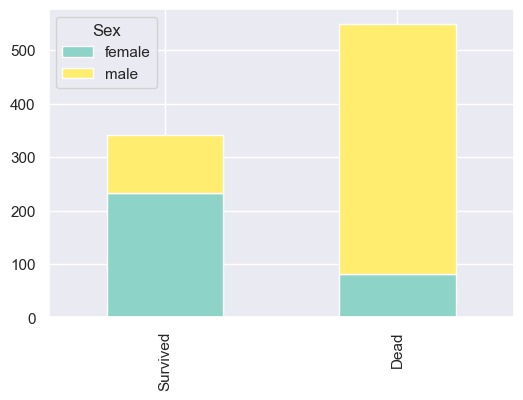

In [388]:
bar_chart('Sex')

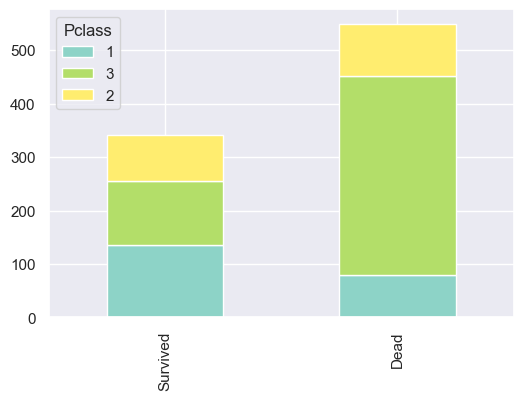

In [389]:
bar_chart('Pclass')

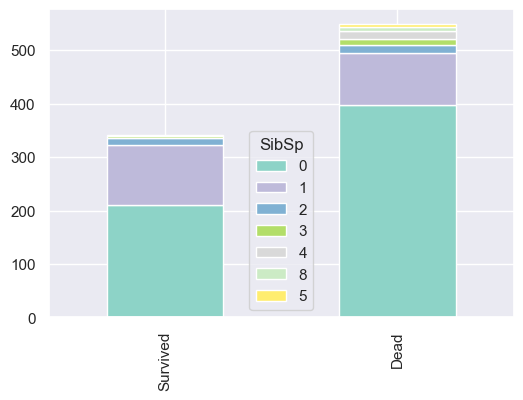

In [390]:
bar_chart('SibSp')

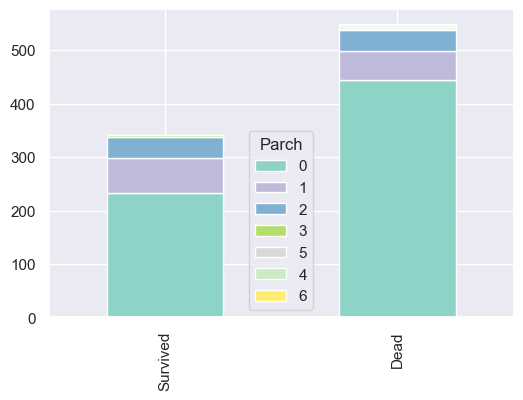

In [391]:
bar_chart('Parch')

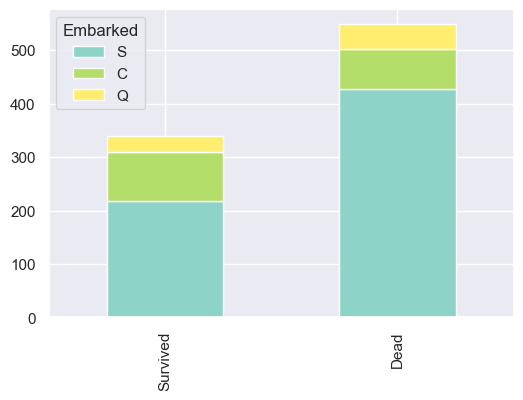

In [392]:
bar_chart('Embarked')

In [393]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [394]:
train[train['Cabin']=='B96 B98']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S


In [395]:
train[train['Cabin']=='C22 C26']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S


### **4. 데이터의 특징 처리하기 : 데이터 전처리**


        [주의사항] : train, test data 동시 전처리

#### 4.1 titanic 침몰 상태?

In [396]:
#Image(data='../data/titanic/img.jpg')

#### 4.2 Name(이름 => Mr, Miss, Mrs 타이틀 추출)

In [397]:
train['Name'].str.extract(' ([A-Za-z]+)\.',expand=False) # expand=True : DataFrame return

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [398]:
train_test_data = [train,test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [399]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [400]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [401]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

#### **4.3 Sex**

- male : 0
- female : 1

In [402]:
sex_mapping = {'male':0, 'female':1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

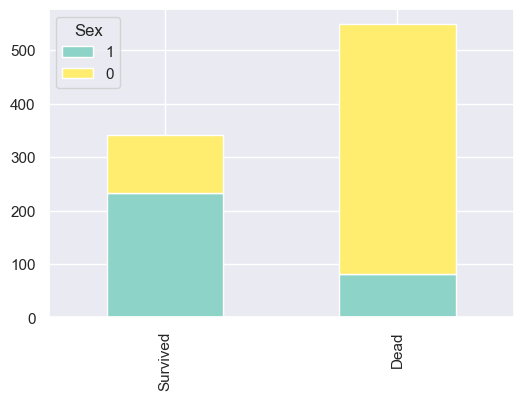

In [403]:
bar_chart('Sex')

#### **4.4 Age**

##### 4.4.1 some age is missing

In [404]:
train['Age'].isnull().sum(), test['Age'].isnull().sum()

(177, 86)

In [405]:
# fill missing age with median age for each title(Mr,Mrs,Miss,Master,Others)
# Age 결측치 해당 Title의 나이의 중앙값으로 채우기

train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

In [406]:
# nan값 제대로 채워졌는지 확인
train['Title'].isnull().sum(),test['Title'].isnull().sum()

(0, 0)

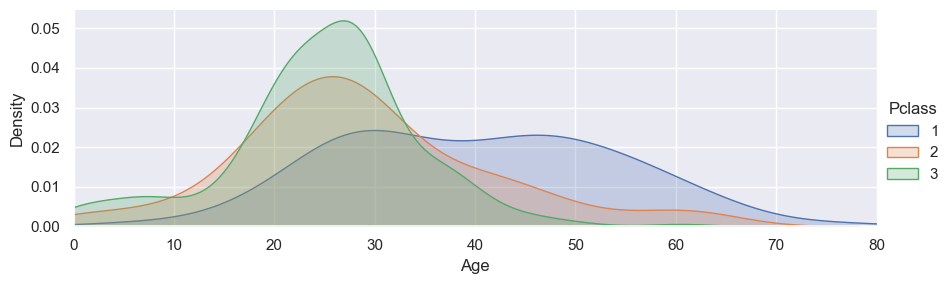

In [407]:
# 나이(float)별 Plclass 그래프

facet = sns.FacetGrid(test,hue='Pclass',aspect=3)   # 그래프 바탕
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,train['Age'].max()))    
facet.add_legend()

plt.show()

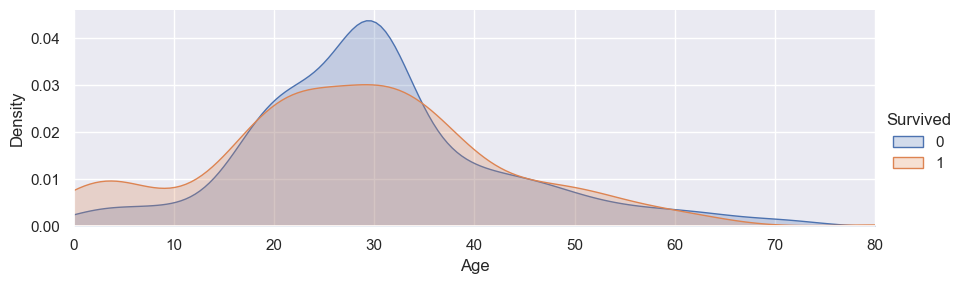

In [408]:
# 나이(float)별 생존여부 그래프
sns.set(color_codes=True)
# 전체 나이
facet = sns.FacetGrid(train, hue='Survived',aspect=3)   # 그래프 바탕
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,train['Age'].max()))                    # x좌표 범위 설정
facet.add_legend()

plt.show()

(0.0, 20.0)

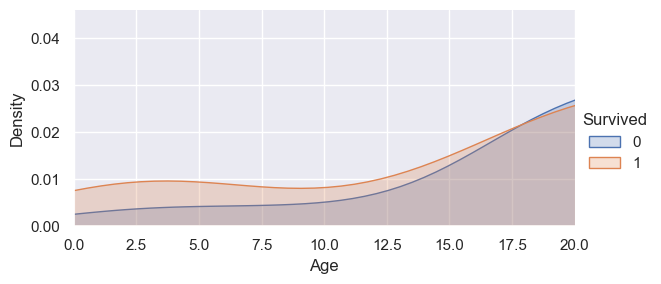

In [409]:
# 0~20세 -> 17세

facet = sns.FacetGrid(train, hue='Survived',aspect=2)   
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,train['Age'].max()))                    
facet.add_legend()

plt.xlim(0,20)

(20.0, 30.0)

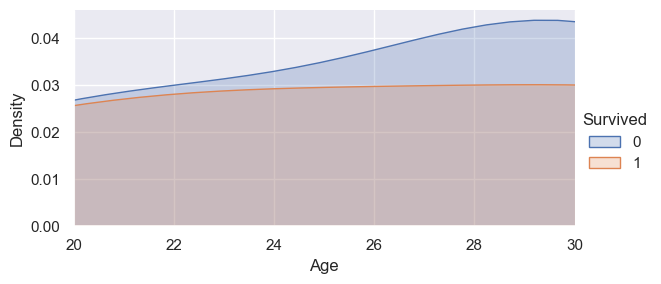

In [410]:
# 20~30세 ->24

facet = sns.FacetGrid(train, hue='Survived',aspect=2)   
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,train['Age'].max()))                    
facet.add_legend()

plt.xlim(20,30)

(30.0, 40.0)

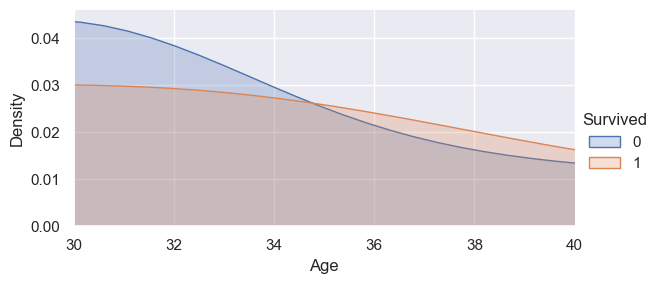

In [411]:
# 30~40세 -> 34

facet = sns.FacetGrid(train, hue='Survived',aspect=2)   
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,train['Age'].max()))                    
facet.add_legend()

plt.xlim(30,40)

(40.0, 50.0)

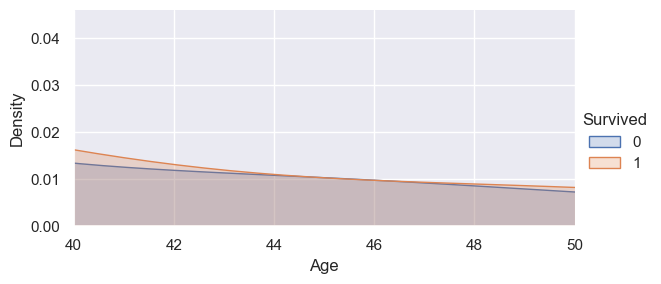

In [412]:
# 40~50세 ->44

facet = sns.FacetGrid(train, hue='Survived',aspect=2)   
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,train['Age'].max()))                    
facet.add_legend()

plt.xlim(40,50)

(50.0, 80.0)

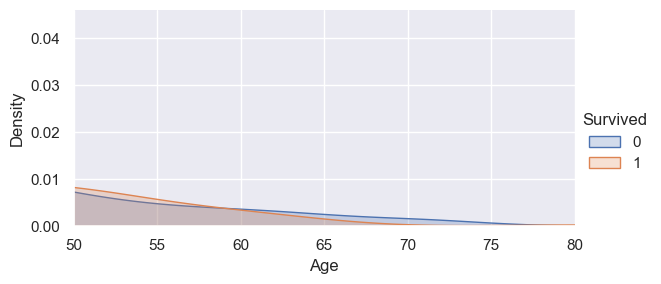

In [413]:
# 50~60세

facet = sns.FacetGrid(train, hue='Survived',aspect=2)   
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0,train['Age'].max()))                    
facet.add_legend()

plt.xlim(50,80)

* 그래프의 교차점을 기준으로 나이(float=연속형)를 카테고리(범주형) 분류하기

##### 4.4.2 Binning

feature vector map:

- child(0< <17) : 0
- young(17< <24) : 1
- adult(24< <34) : 2
- mid-age1(34< <44) : 3
- mid-age2(44< <60) : 4 
- senior(60<) : 5

##### Title mapping :

variable -> feature

- Mr : 0
- Miss : 1
- Mrs :2
- Master :3
- Others : 4

In [414]:
#for dataset in train_test_data:
#    dataset['Title'] = dataset['Title'].map(title_mapping)

In [415]:
# Convert to categorical values Title 
for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
    dataset["Title"] = dataset["Title"].astype(int)


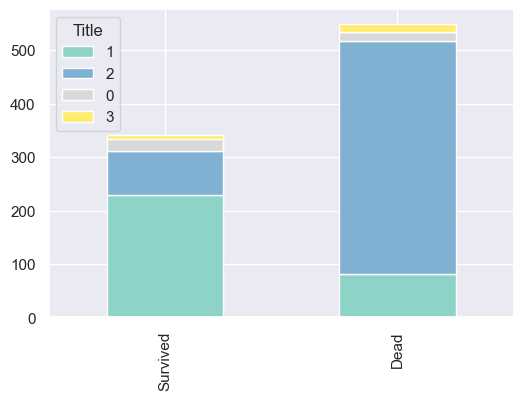

In [416]:
bar_chart('Title')

In [417]:
train = pd.get_dummies(train, columns = ["Title"],dtype='int')
test = pd.get_dummies(test, columns = ["Title"],dtype='int')

In [418]:
train.loc[train['Age'] <= 17] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,1,0,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S,0,1,0,0
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",1,14.0,0,0,350406,7.8542,NaN,S,0,1,0,0
16,17,0,3,"Rice, Master. Eugene",0,2.0,4,1,382652,29.1250,NaN,Q,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",0,4.0,4,2,347082,31.2750,NaN,S,1,0,0,0
852,853,0,3,"Boulos, Miss. Nourelain",1,9.0,1,1,2678,15.2458,NaN,C,0,1,0,0
853,854,1,1,"Lines, Miss. Mary Conover",1,16.0,0,1,PC 17592,39.4000,D28,S,0,1,0,0
869,870,1,3,"Johnson, Master. Harold Theodor",0,4.0,1,1,347742,11.1333,NaN,S,1,0,0,0


In [419]:
train.loc[train['Age'] <= 17,'Age']

7       2.0
9      14.0
10      4.0
14     14.0
16      2.0
       ... 
850     4.0
852     9.0
853    16.0
869     4.0
875    15.0
Name: Age, Length: 117, dtype: float64

In [420]:
train_cp = train.copy()

train_cp.loc[train_cp['Age'] <= 17,'Age'] = 0
train_cp.loc[(train_cp['Age'] > 17) & (train_cp['Age'] <= 24), 'Age'] = 1

train_cp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [421]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 17, 'Age'] =0
    dataset.loc[(dataset['Age'] >17) & (dataset['Age'] <= 24), 'Age'] = 1
    dataset.loc[(dataset['Age'] >24) & (dataset['Age'] <= 34), 'Age'] = 2
    dataset.loc[(dataset['Age'] >34) & (dataset['Age'] <= 44), 'Age'] = 3
    dataset.loc[(dataset['Age'] >44) & (dataset['Age'] <= 60), 'Age'] = 4
    dataset.loc[dataset['Age'] >60, 'Age'] = 5

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [422]:
train['Age'].value_counts()

Age
30.00    144
21.00     60
35.00     35
24.00     30
22.00     27
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 90, dtype: int64

In [423]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title_0      891 non-null    int32  
 13  Title_1      891 non-null    int32  
 14  Title_2      891 non-null    int32  
 15  Title_3      891 non-null    int32  
dtypes: float64(2), int32(4), int64(6), object(4)
memory usage: 97.6+ KB


In [424]:
test['Age'].value_counts()

Age
28.5    58
22.0    30
21.0    17
24.0    17
30.0    15
        ..
76.0     1
67.0     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 79, dtype: int64

In [425]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title_0      891 non-null    int32  
 13  Title_1      891 non-null    int32  
 14  Title_2      891 non-null    int32  
 15  Title_3      891 non-null    int32  
dtypes: float64(2), int32(4), int64(6), object(4)
memory usage: 97.6+ KB


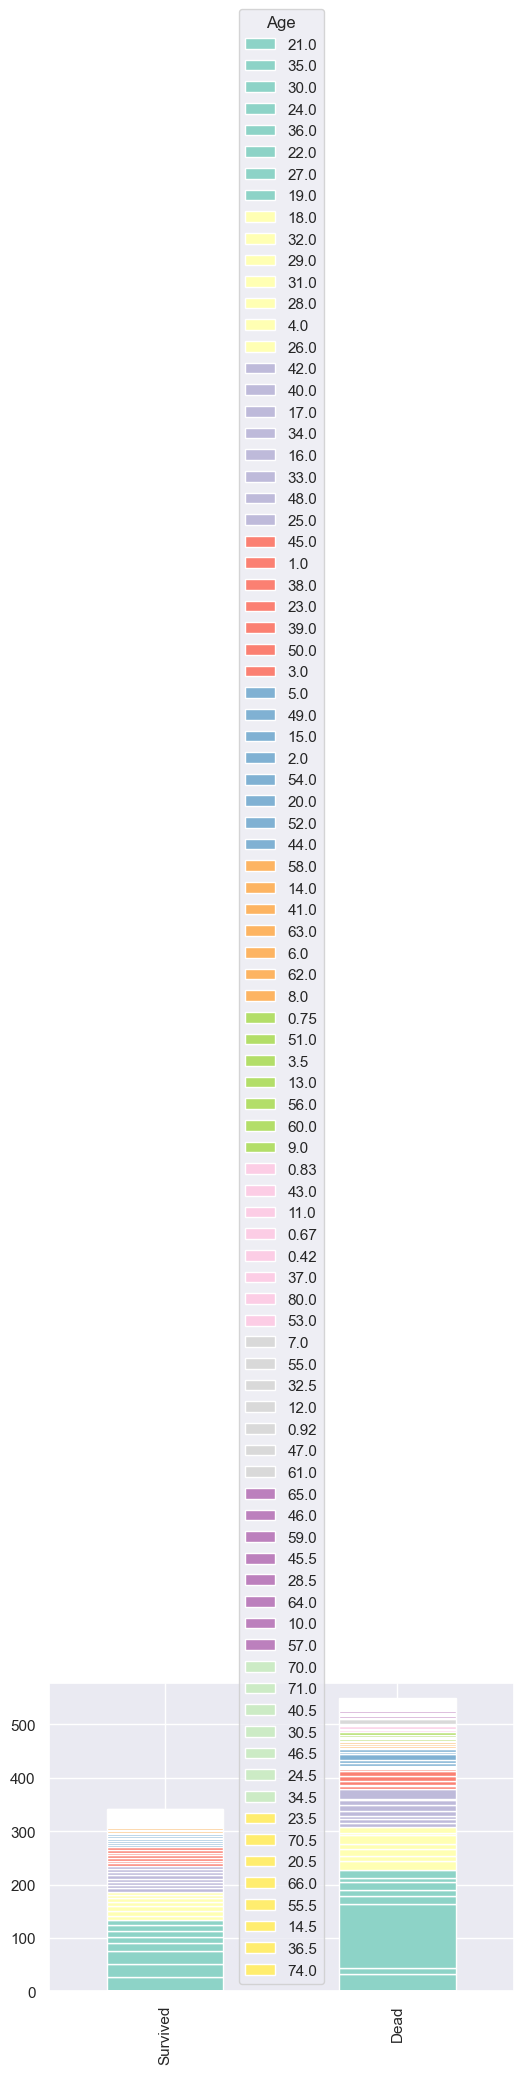

In [426]:
bar_chart('Age')

#### 4.5 Embarked(도시 선착장)

##### 4.5.1 filling missing vlaues

In [427]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,0,1,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,0,1,0,0


In [428]:
train[train['Pclass']==1]['Embarked'].value_counts() # -> Series

Embarked
S    127
C     85
Q      2
Name: count, dtype: int64

<Axes: >

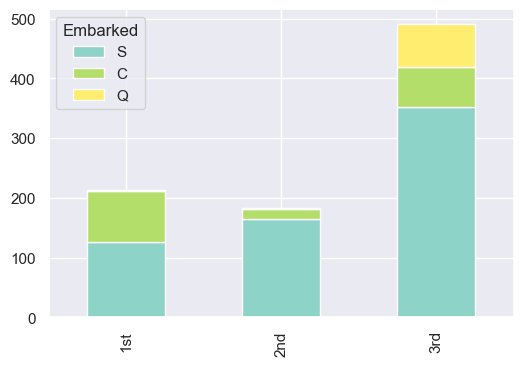

In [429]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st','2nd','3rd']
df.plot(kind='bar', stacked=True, figsize=(6,4),colormap='Set3')

In [430]:
df

Embarked,S,C,Q
1st,127,85,2
2nd,164,17,3
3rd,353,66,72


In [431]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [432]:
# 대부분 S embark 에서 탐 => fillna('S')

train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

In [433]:
train['Embarked'].isnull().sum(), test['Embarked'].isnull().sum()

(0, 0)

In [434]:
train['Embarked'].value_counts().index

Index(['S', 'C', 'Q'], dtype='object', name='Embarked')

In [435]:
train = pd.get_dummies(train, columns = ["Embarked"], prefix="Em",dtype='int')
test = pd.get_dummies(test, columns = ["Embarked"], prefix="Em",dtype='int')

In [436]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,1


#### 4.6 Fare (티켓 가격)

In [437]:
train['Fare'].isnull().sum(), test['Fare'].isnull().sum()

(0, 1)

In [438]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          417 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Title_0      418 non-null    int32  
 11  Title_1      418 non-null    int32  
 12  Title_2      418 non-null    int32  
 13  Title_3      418 non-null    int32  
 14  Em_C         418 non-null    int32  
 15  Em_Q         418 non-null    int32  
 16  Em_S         418 non-null    int32  
dtypes: float64(2), int32(7), int64(5), object(3)
memory usage: 44.2+ KB


In [439]:
test['Fare'].fillna(
    test.groupby('Pclass')['Fare'].transform('median'), inplace=True
)

In [440]:
test['Fare'].isnull().sum()

0

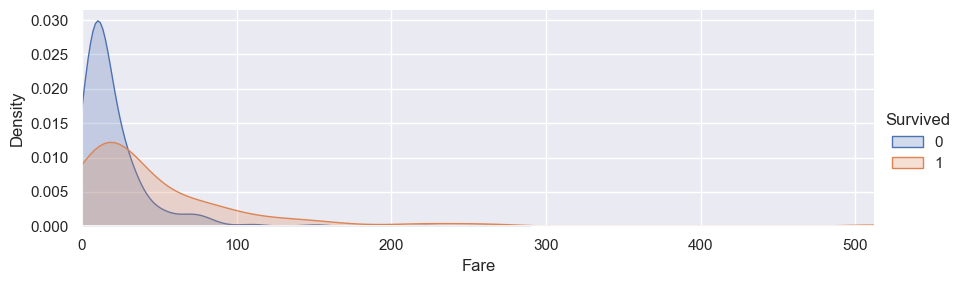

In [441]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Fare',fill= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show()

(0.0, 50.0)

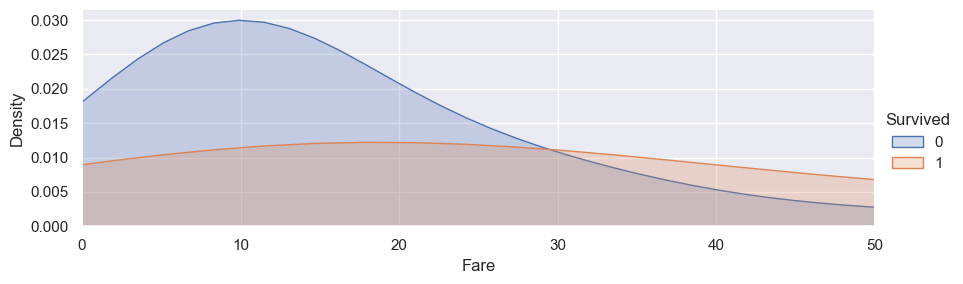

In [442]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Fare',fill= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,50)

(50.0, 120.0)

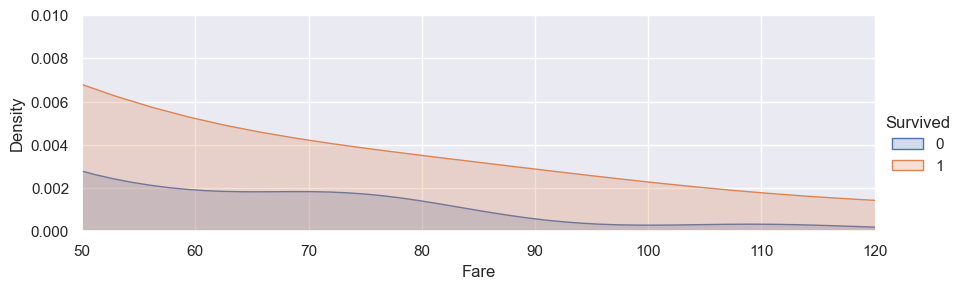

In [443]:
facet = sns.FacetGrid(train, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Fare',fill= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.ylim(0,0.01)
plt.xlim(50,120)

In [444]:
train[train['Fare'] > 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
258,259,1,1,"Ward, Miss. Anna",1,35.0,0,0,PC 17755,512.3292,NaN,0,1,0,0,1,0,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,36.0,0,1,PC 17755,512.3292,B51 B53 B55,0,0,1,0,1,0,0
737,738,1,1,"Lesurer, Mr. Gustave J",0,35.0,0,0,PC 17755,512.3292,B101,0,0,1,0,1,0,0


Fare binning

- 0< <17 : 0
- 17< <30 : 1
- 30< <100 :2
- 100< :3 

In [445]:
train.loc[train['Fare'] <= 17,'Fare'] = 0
train.loc[(train['Fare'] >17) & (train['Fare'] <=30), 'Fare'] = 1
train.loc[(train['Fare'] >30) & (train['Fare'] <=100), 'Fare'] = 2
train.loc[train['Fare'] > 100,'Fare'] = 3

In [446]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0.0,NaN,0,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,2.0,C85,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,0.0,NaN,0,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,2.0,C123,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,0.0,NaN,0,0,1,0,0,0,1


In [447]:
test.loc[test['Fare'] <= 17,'Fare'] = 0
test.loc[(test['Fare'] >17) & (test['Fare'] <=30), 'Fare'] = 1
test.loc[(test['Fare'] >30) & (test['Fare'] <=100), 'Fare'] = 2
test.loc[test['Fare'] > 100,'Fare'] = 3

In [448]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,0.0,NaN,0,0,1,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,0.0,NaN,0,1,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,0.0,NaN,0,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,0.0,NaN,0,0,1,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,0.0,NaN,0,1,0,0,0,0,1


In [449]:
train=train.astype({'Fare':'int'})
test=test.astype({'Fare':'int'})

In [450]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int32  
 10  Cabin        204 non-null    object 
 11  Title_0      891 non-null    int32  
 12  Title_1      891 non-null    int32  
 13  Title_2      891 non-null    int32  
 14  Title_3      891 non-null    int32  
 15  Em_C         891 non-null    int32  
 16  Em_Q         891 non-null    int32  
 17  Em_S         891 non-null    int32  
dtypes: float64(1), int32(8), int64(6), object(3)
memor

<Axes: >

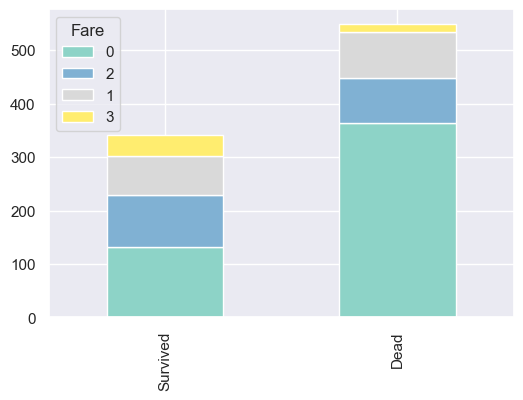

In [451]:
survived = train[train['Survived'] == 1]['Fare'].value_counts()
dead = train[train['Survived'] == 0]['Fare'].value_counts()
df = pd.DataFrame([survived,dead])
df.index=['Survived','Dead']

df.plot(kind='bar', stacked=True, figsize=(6,4),colormap='Set3')


In [452]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

#### 4.7 Cabin (객실정보)

In [453]:
train[train['Cabin']=='T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
339,340,0,1,"Blackwell, Mr. Stephen Weart",0,45.0,0,0,113784,2,T,0,0,1,0,0,0,1


In [454]:
train[train['Cabin'].str.extract('([A]\d+)',expand=False).notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
23,24,1,1,"Sloper, Mr. William Thompson",0,28.0,0,0,113788,2,A6,0,0,1,0,0,0,1
96,97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,2,A5,0,0,1,0,1,0,0
174,175,0,1,"Smith, Mr. James Clinch",0,56.0,0,0,17764,2,A7,0,0,1,0,1,0,0
185,186,0,1,"Rood, Mr. Hugh Roscoe",0,30.0,0,0,113767,2,A32,0,0,1,0,0,0,1
209,210,1,1,"Blank, Mr. Henry",0,40.0,0,0,112277,2,A31,0,0,1,0,1,0,0
284,285,0,1,"Smith, Mr. Richard William",0,30.0,0,0,113056,1,A19,0,0,1,0,0,0,1
445,446,1,1,"Dodge, Master. Washington",0,4.0,0,2,33638,2,A34,1,0,0,0,0,0,1
475,476,0,1,"Clifford, Mr. George Quincy",0,30.0,0,0,110465,2,A14,0,0,1,0,0,0,1
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",1,48.0,1,0,11755,2,A16,0,0,0,1,1,0,0
583,584,0,1,"Ross, Mr. John Hugo",0,36.0,0,0,13049,2,A10,0,0,1,0,1,0,0


In [455]:
train[train['Cabin'].str.extract('(D\d+)',expand=False).notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
21,22,1,2,"Beesley, Mr. Lawrence",0,34.0,0,0,248698,0,D56,0,0,1,0,0,0,1
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",1,49.0,1,0,PC 17572,2,D33,0,1,0,0,1,0,0
97,98,1,1,"Greenfield, Mr. William Bertram",0,23.0,0,1,PC 17759,2,D10 D12,0,0,1,0,1,0,0
102,103,0,1,"White, Mr. Richard Frasar",0,21.0,0,1,35281,2,D26,0,0,1,0,0,0,1
124,125,0,1,"White, Mr. Percival Wayland",0,54.0,0,1,35281,2,D26,0,0,1,0,0,0,1
136,137,1,1,"Newsom, Miss. Helen Monypeny",1,19.0,0,2,11752,1,D47,0,1,0,0,0,0,1
215,216,1,1,"Newell, Miss. Madeleine",1,31.0,1,0,35273,3,D36,0,1,0,0,1,0,0
218,219,1,1,"Bazzani, Miss. Albina",1,32.0,0,0,11813,2,D15,0,1,0,0,1,0,0
248,249,1,1,"Beckwith, Mr. Richard Leonard",0,37.0,1,1,11751,2,D35,0,0,1,0,0,0,1
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",1,63.0,1,0,13502,2,D7,0,1,0,0,0,0,1


In [456]:
train[train['Cabin'].str.extract('([F] [A-Z]\d+)',expand=False).notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
75,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,0,F G73,0,0,1,0,0,0,1
128,129,1,3,"Peter, Miss. Anna",1,21.0,1,1,2668,1,F E69,0,1,0,0,1,0,0
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",0,42.0,0,0,348121,0,F G63,0,0,1,0,0,0,1
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",0,19.0,0,0,348124,0,F G73,0,0,1,0,0,0,1


In [457]:
train[train['Cabin'].str.extract('([A-Z]\d+ [A-Z]\d+)',expand=False).notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
27,28,0,1,"Fortune, Mr. Charles Alexander",0,19.00,3,2,19950,3,C23 C25 C27,0,0,1,0,0,0,1
88,89,1,1,"Fortune, Miss. Mabel Helen",1,23.00,3,2,19950,3,C23 C25 C27,0,1,0,0,0,0,1
97,98,1,1,"Greenfield, Mr. William Bertram",0,23.00,0,1,PC 17759,2,D10 D12,0,0,1,0,1,0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",0,24.00,0,1,PC 17558,3,B58 B60,0,0,1,0,1,0,0
297,298,0,1,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,3,C22 C26,0,1,0,0,0,0,1
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",1,50.00,0,1,PC 17558,3,B58 B60,0,1,0,0,1,0,0
305,306,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,3,C22 C26,1,0,0,0,0,0,1
311,312,1,1,"Ryerson, Miss. Emily Borie",1,18.00,2,2,PC 17608,3,B57 B59 B63 B66,0,1,0,0,1,0,0
341,342,1,1,"Fortune, Miss. Alice Elizabeth",1,24.00,3,2,19950,3,C23 C25 C27,0,1,0,0,0,0,1
390,391,1,1,"Carter, Mr. William Ernest",0,36.00,1,2,113760,3,B96 B98,0,0,1,0,0,0,1


In [458]:
#grid = sns.FacetGrid(train, row='Embarked', col='Survived', aspect=1.6)
#grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5)
#grid.add_legend()

In [459]:
train[train['Pclass']==1]['Cabin'].value_counts()

Cabin
B96 B98        4
C23 C25 C27    4
C22 C26        3
E24            2
E67            2
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 133, dtype: int64

In [460]:
train[train['Pclass']==1]['Cabin'].isnull().sum()

40

In [461]:
train[train['Pclass']==3]['Cabin'].unique()

array([nan, 'G6', 'F G73', 'F E69', 'E10', 'F G63', 'E121', 'F38'],
      dtype=object)

In [462]:
train[train['Cabin'].str.extract('(F\d+)',expand=False).notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",1,29.0,0,0,C.A. 29395,0,F33,0,1,0,0,0,0,1
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",0,36.5,0,2,230080,1,F2,0,0,1,0,0,0,1
183,184,1,2,"Becker, Master. Richard F",0,1.0,2,1,230136,2,F4,1,0,0,0,0,0,1
193,194,1,2,"Navratil, Master. Michel M",0,3.0,1,1,230080,1,F2,1,0,0,0,0,0,1
340,341,1,2,"Navratil, Master. Edmond Roger",0,2.0,1,1,230080,1,F2,1,0,0,0,0,0,1
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",1,24.0,0,0,248733,0,F33,0,1,0,0,0,0,1
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",1,34.0,0,0,C.A. 34260,0,F33,0,1,0,0,0,0,1
618,619,1,2,"Becker, Miss. Marion Louise",1,4.0,2,1,230136,2,F4,0,1,0,0,0,0,1
776,777,0,3,"Tobin, Mr. Roger",0,30.0,0,0,383121,0,F38,0,0,1,0,0,1,0


In [463]:
train[train['Pclass']==2]['Cabin'].isnull().sum()

168

In [464]:
train[train['Pclass']==3]['Cabin'].value_counts()

Cabin
G6       4
F G73    2
E121     2
F E69    1
E10      1
F G63    1
F38      1
Name: count, dtype: int64

In [465]:
train[train['Pclass']==3]['Cabin'].isnull().sum()

479

In [466]:
train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]

In [467]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}

train['Cabin'] = train['Cabin'].map(cabin_mapping)
test['Cabin'] = test['Cabin'].map(cabin_mapping)

In [468]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [469]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,2.0,0,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,2,0.8,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,0,2.0,0,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,2,0.8,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,0,2.0,0,0,1,0,0,0,1


#### 4.8 FamilySize(가족의 크기)

In [470]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int32  
 10  Cabin        891 non-null    float64
 11  Title_0      891 non-null    int32  
 12  Title_1      891 non-null    int32  
 13  Title_2      891 non-null    int32  
 14  Title_3      891 non-null    int32  
 15  Em_C         891 non-null    int32  
 16  Em_Q         891 non-null    int32  
 17  Em_S         891 non-null    int32  
dtypes: float64(2), int32(8), int64(6), object(2)
memor

In [471]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1


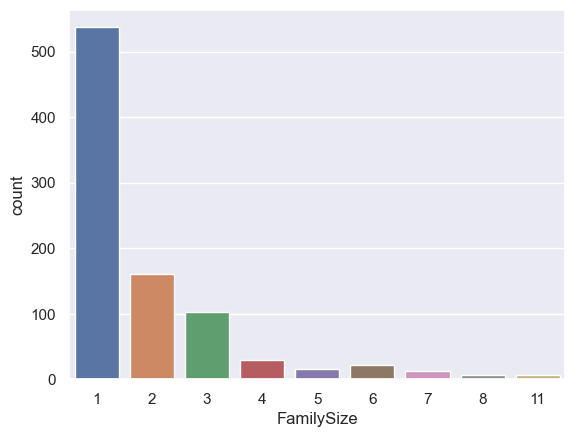

In [472]:
ax = sns.countplot(data=train, x='FamilySize')
plt.show()

(0.0, 1.0)

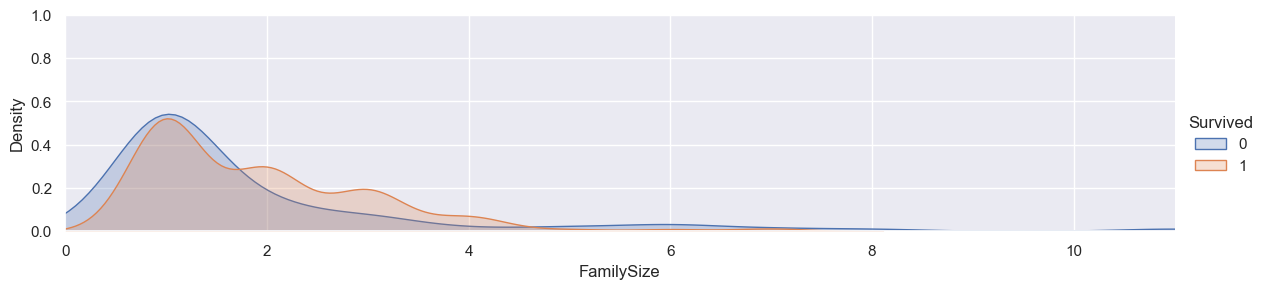

In [473]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',fill= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.ylim(0,1)

In [474]:
train['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [475]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
train['FamilySize'] = train['FamilySize'].map(family_mapping)
test['FamilySize'] = test['FamilySize'].map(family_mapping)

In [476]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,2.0,0,0,1,0,0,0,1,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,2,0.8,0,1,0,0,1,0,0,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,0,2.0,0,1,0,0,0,0,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,2,0.8,0,1,0,0,0,0,1,0.4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,0,2.0,0,0,1,0,0,0,1,0.0


---

### Modelling

In [477]:
features_drop = ['Ticket','SibSp','Parch','Name']
train = train.drop(features_drop,axis=1)
test = test.drop(features_drop, axis=1)
#train = train.drop(['PassengerId'],axis=1)


In [478]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']

train_data.shape,target.shape

((891, 14), (891,))

In [479]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
dd

In [ ]:
parameters = {'n_estimators':[500,600]
              ,'max_depth':[8,9,10]
              ,'min_samples_split':[2,3]
              }

k_fold = KFold(n_splits=10,shuffle=True, random_state=42)
rf_clf = RandomForestClassifier()
scoring = 'accuracy'
grid_clf = GridSearchCV(rf_clf,param_grid=parameters,scoring=scoring,cv=k_fold,n_jobs=-1)

grid_clf.fit(train_data,target)
print(grid_clf.best_params_)
print(grid_clf.best_score_)



In [ ]:
parameters = {'n_estimators':[300,700,1000]
              ,'max_depth':[2,4,6,8,10]}

k_fold = KFold(n_splits=10,shuffle=True, random_state=42)
xgb_clf = XGBClassifier()
scoring = 'accuracy'
grid_clf = GridSearchCV(xgb_clf,param_grid=parameters,scoring=scoring,cv=k_fold,n_jobs=-1)

grid_clf.fit(train_data,target)
print(grid_clf.best_params_)
print(grid_clf.best_score_)



{'max_depth': 2, 'n_estimators': 300}
0.8024469413233458


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
k_fold = KFold(n_splits=10,shuffle=True, random_state=42)
clf = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.8249063670411985


---

### Testing

In [481]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S,FamilySize
0,892,3,0,34.5,0,2.0,0,0,1,0,0,1,0,0.0
1,893,3,1,47.0,0,2.0,0,1,0,0,0,0,1,0.4
2,894,2,0,62.0,0,2.0,0,0,1,0,0,1,0,0.0
3,895,3,0,27.0,0,2.0,0,0,1,0,0,0,1,0.0
4,896,3,1,22.0,0,2.0,0,1,0,0,0,0,1,0.8


In [482]:
test.loc[test['Age'].isnull(),'Age'] = 30

In [483]:
clf = RandomForestClassifier(max_depth= 8
                             , min_samples_split= 3
                             , n_estimators= 600)
clf.fit(train_data, target)

prediction = clf.predict(test)

In [484]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Title_0        0
Title_1        0
Title_2        0
Title_3        0
Em_C           0
Em_Q           0
Em_S           0
FamilySize     0
dtype: int64

In [485]:
submission = pd.DataFrame({

    'PassengerId':test['PassengerId']
    ,'Survived':prediction
})

In [486]:
submission.to_csv('submission.csv',index=False)